# BEE2041 Empirical Project - Spotify Tracks In Different Genres

In [61]:
# Importing libraries

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


from pystout import pystout

# Replace 'ROOT' with the path to the saved folder

ROOT = "/Users/valterbarros/Desktop/spotify data/"
DAT  = ROOT+'data/'
FIG  = ROOT+'results/figures/'
TAB  = ROOT+'results/tables/'

In [62]:
# Using pandas to create a dataframe with the Spotify's track data

spot_df = pd.read_csv(DAT + 'spotify-tracks-dataset.csv')

## 1. Data Overview

In [63]:
print('Number of Rows:', spot_df.shape[0])
print('Number of Columns:', spot_df.shape[1])

print('Column Names:' , spot_df.columns)

Number of Rows: 114000
Number of Columns: 21
Column Names: Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [64]:
spot_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [65]:
spot_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


## 2. Data Cleaning and Preparation

In [66]:
# Checking the columns with missing values
print(spot_df.isnull().sum())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [67]:
# There is a row with missing missing artist, album and track names. 
# It is likely a song that has been removed from Spotify so we will remove it from the dataset.

display(spot_df[spot_df.isnull().any(axis=1)])

spot_df = spot_df.dropna()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [68]:
# Checking for duplicate values on the 'track_id' column
print('number of duplicates', spot_df.duplicated(subset=['track_id']).sum())

number of duplicates 24259


In [69]:
display(spot_df[spot_df.duplicated(subset=['track_id'])].head(1))

spot_df[spot_df['track_id']=='0CDucx9lKxuCZplLXUz0iX']

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,...,-7.544,1,0.0438,0.238,0.86,0.0571,0.843,90.522,4,afrobeat


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1874,1874,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,...,-7.544,1,0.0438,0.238,0.86,0.0571,0.843,90.522,4,afrobeat
1925,1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,...,-7.544,1,0.0438,0.238,0.86,0.0571,0.843,90.522,4,afrobeat


In [70]:
spot_df.drop_duplicates(subset='track_id', inplace=True)
spot_df[spot_df['track_id']=='0CDucx9lKxuCZplLXUz0iX']

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1874,1874,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,...,-7.544,1,0.0438,0.238,0.86,0.0571,0.843,90.522,4,afrobeat


In [71]:
# Another issue we have with the data is the in the 'artists' column. Some songs have featured artists alongside the main artist. 
# Because of this, we will split the 'artists' column into two columns: 'main_artist' and 'featured_artist'. 

spot_df[['main_artist', 'feature']] = spot_df['artists'].str.split(';', n=1, expand=True)

spot_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,main_artist,feature
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Gen Hoshino,None
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Ben Woodward,None
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Ingrid Michaelson,ZAYN
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Kina Grannis,None
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Chord Overstreet,None


### 3. Data Analysis - Artists & Genres

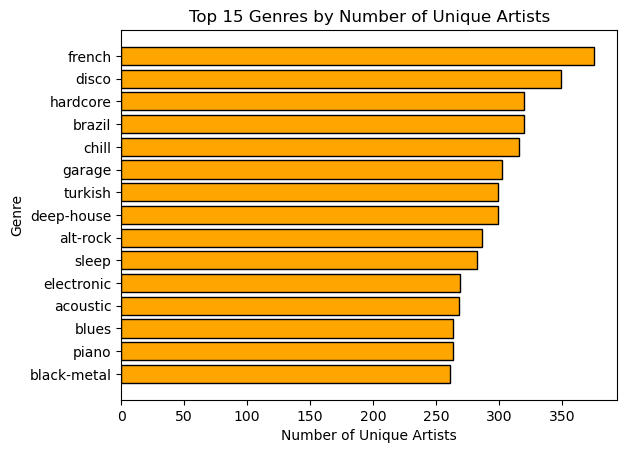

In [72]:
# Plotting how many unique artists each genre has

genre_unique_artist = spot_df.groupby('track_genre')['main_artist'].nunique().sort_values(ascending=False).head(15)

plt.barh(genre_unique_artist.index, genre_unique_artist.values, edgecolor='black', color='orange')
plt.gca().invert_yaxis()
plt.xlabel('Number of Unique Artists')
plt.ylabel('Genre')

plt.title('Top 15 Genres by Number of Unique Artists')

plt.savefig(FIG+'genre_unique_artist.pdf')

plt.show()

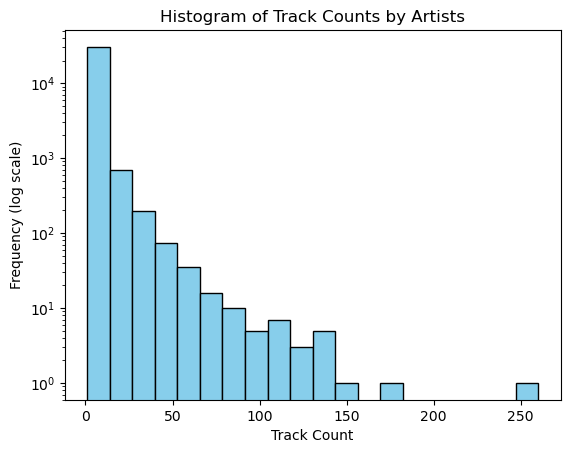

In [73]:
# Plotting the distribution of track counts across artists

plt.hist(spot_df.groupby('artists')['track_id'].count().sort_values(ascending=False), bins=20, edgecolor='black', color='skyblue')

# Most artists only have a few songs on the dataset. 
# To account for the uneven distribution of songs by artists, we can use a log scale on the y-axis.

plt.yscale('log')

plt.xlabel('Track Count')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Track Counts by Artists')

plt.savefig(FIG+'hist_artist_track_count.pdf')

plt.show()

In [74]:
# To determine the most popular artists, we will calculate the mean popularity of the tracks they have on the dataset.
# Many of them only have one song, which might not be a good indicator of an artist's popularity.
# As a result, we will only consider artists with more than 2 songs in the dataset.

top_artists_df = spot_df.groupby('main_artist').agg({'popularity': 'mean', 'track_genre': pd.Series.mode})\
[spot_df.groupby('main_artist')['track_id'].count().sort_values(ascending=False) > 2] # filtering out artists with 2 songs or less

top_artists_df.columns = ['average_popularity', 'most_common_genre']

top_artists_df = top_artists_df.sort_values(by='average_popularity', ascending=False)

top_artists_df.head(15).to_csv(TAB+'top_artists.csv')

top_artists_df.head(15)



/var/folders/bj/9jn0z_990vg0ghj4rs__0f7w0000gn/T/ipykernel_55208/3466988849.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_artists_df = spot_df.groupby('main_artist').agg({'popularity': 'mean', 'track_genre': pd.Series.mode})\


,average_popularity,most_common_genre
main_artist,,
Harry Styles,92.000000,pop
Olivia Rodrigo,87.400000,pop
Mora,84.250000,latino
The Kid LAROI,84.000000,hip-hop
IVE,84.000000,k-pop
Morgan Wallen,83.333333,country
One Direction,83.000000,pop
Kendrick Lamar,83.000000,hip-hop
Lil Nas X,82.750000,hip-hop


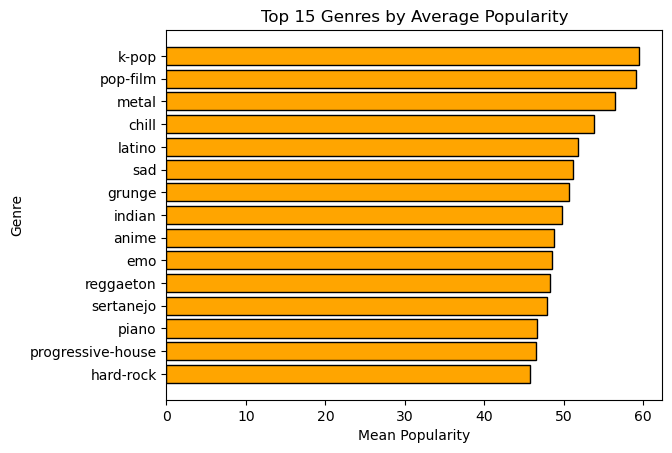

In [75]:
# Plotting the top 15 genres by average track popularity

top_genres_df = spot_df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)
top_genres_df.columns = ['average_popularity']

plt.barh(top_genres_df.index, top_genres_df.values, edgecolor='black', color='orange')
plt.gca().invert_yaxis()
plt.xlabel('Mean Popularity')
plt.ylabel('Genre')

plt.title('Top 15 Genres by Average Popularity')

plt.savefig(FIG+'top_15_genres.pdf')

plt.show()

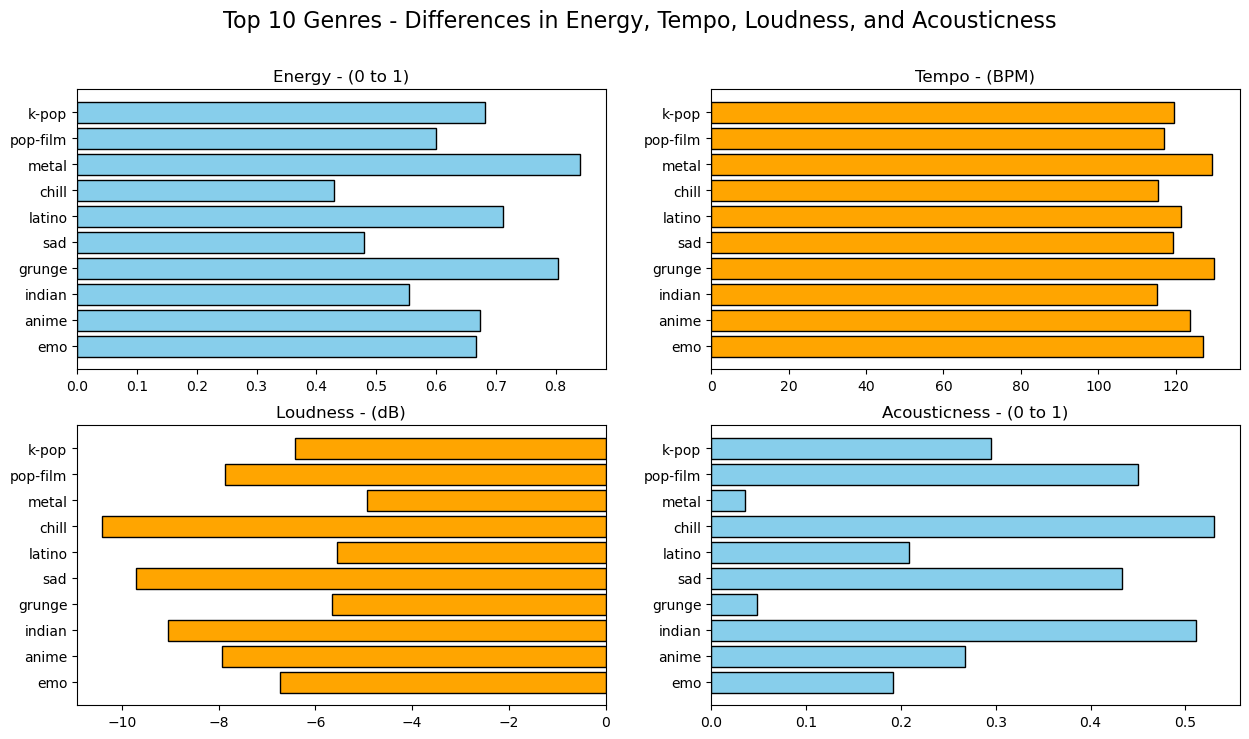

In [76]:
# Finally, we can see how the top 10 genres differ in terms of energy, tempo, loudness, and acousticness.

top_genres_features=  spot_df.groupby('track_genre').agg({'popularity': 'mean',
                                                           'energy': 'mean',
                                                           'tempo': 'mean',
                                                           'loudness': 'mean',
                                                           'acousticness': 'mean'
                                                           }).sort_values(by='popularity', ascending=False).head(10)

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

axes[0, 0].barh(top_genres_features.index, top_genres_features['energy'], edgecolor='black', color='skyblue')
axes[0, 0].set_title('Energy - (0 to 1)')
axes[0,0].invert_yaxis()

axes[0, 1].barh(top_genres_features.index, top_genres_features['tempo'], edgecolor='black', color='orange')
axes[0, 1].set_title('Tempo - (BPM)')
axes[0, 1].invert_yaxis()

axes[1, 0].barh(top_genres_features.index, top_genres_features['loudness'], edgecolor='black', color='orange')
axes[1, 0].set_title('Loudness - (dB)')
axes[1, 0].invert_yaxis()

axes[1, 1].barh(top_genres_features.index, top_genres_features['acousticness'], edgecolor='black', color='skyblue')
axes[1, 1].set_title('Acousticness - (0 to 1)')
axes[1, 1].invert_yaxis()

plt.suptitle('Top 10 Genres - Differences in Energy, Tempo, Loudness, and Acousticness', fontsize=16)

plt.savefig(FIG+'top_10_genres_features.pdf')

plt.show()


### 4. Regression

In [77]:
# To create a regression model to predict the popularity of a song, we will use the quantitative features:

x = spot_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = spot_df['popularity']

# With this, we can create a linear regression model.
# To take into account the baseline popularity of a song, we will add a constant to X.

x_const = sm.add_constant(X)

linear_model = sm.OLS(y, x_const).fit()

regression_table = linear_model.summary()


with open(TAB + 'ols_results.txt', 'w') as f:
    f.write(regression_table.as_text())

print(regression_table)

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     312.6
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:41:15   Log-Likelihood:            -3.9736e+05
No. Observations:               89740   AIC:                         7.947e+05
Df Residuals:                   89730   BIC:                         7.948e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               35.8848      0.668  

In [90]:
# We can also try to use a logistic regression model to predict if a song is more popular than average (the average of the dataset) . 

spot_df['popularity_binary'] = (spot_df['popularity'] > spot_df['popularity'].mean()).astype(int)

X = spot_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = spot_df['popularity_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logistic_model = LogisticRegression(random_state=42).fit(X_train_scaled, y_train)

# Making predictions:
y_pred = logistic_model.predict(X_test_scaled)

# Evaluating the model on its accuracy:

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(class_report) 

with open(TAB + 'classification_report.txt', 'w') as f:
    f.write("Accuracy: {}\n".format(accuracy))
    f.write("Classification Report:\n")
    f.write(class_report)

Accuracy: 0.5745486962335636
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.52      0.55      9045
           1       0.56      0.63      0.59      8903

    accuracy                           0.57     17948
   macro avg       0.58      0.57      0.57     17948
weighted avg       0.58      0.57      0.57     17948



In [79]:
# Instead of looking at the impacts of any single feature on popularity as a whole, we can look at that impact within the genre. 

# We need to create a new column with the mean popularity of each genre a song belongs to.

genres_mean = spot_df.groupby('track_genre')['popularity'].mean()

spot_df['mean_genre_popularity'] = spot_df['track_genre'].map(genres_mean)

spot_df.head(1)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,main_artist,feature,popularity_binary,mean_genre_popularity
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,0.000001,0.358,0.715,87.917,4,acoustic,Gen Hoshino,None,1,42.483


In [80]:
# Creating a binary column to indicate if a song is more popular than the average of its genre, similar to how we did with the dataset.

spot_df['popularity_binary'] = (spot_df['popularity'] > spot_df['mean_genre_popularity']).astype(int)

top_groups = spot_df.groupby('track_genre')['popularity'].mean().head(15).sort_values(ascending=False).index.to_list()

genre_groups = spot_df[spot_df['track_genre'].isin(top_groups)].groupby('track_genre')


In [81]:
# Dictionary to store genre accuracies
genre_model = {}
genre_accuracies = {}

# Iterate over each genre group
for genre, group_df in genre_groups:
    
    X_genre = group_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
    y_genre = group_df['popularity_binary']
    X_genre_train, X_genre_test, y_genre_train, y_genre_test = train_test_split(X_genre, y_genre, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_genre_train_scaled = scaler.fit_transform(X_genre_train)
    X_genre_test_scaled = scaler.transform(X_genre_test)
    
    
    logistic_model = LogisticRegression(random_state=42).fit(X_genre_train_scaled, y_genre_train)
    
    # Making predictions:
    y_genre_pred = logistic_model.predict(X_genre_test_scaled)
    
    # Evaluate the model on its accuracy:

    accuracy_genre = accuracy_score(y_genre_test, y_genre_pred)
    print(f"Accuracy for {genre}:", accuracy_genre)
    
    # Storing the results
    genre_model[genre] = logistic_model
    genre_accuracies[genre] = accuracy_genre


Accuracy for acoustic: 0.635
Accuracy for afrobeat: 0.67
Accuracy for alt-rock: 0.55
Accuracy for alternative: 0.7682926829268293
Accuracy for ambient: 0.64
Accuracy for anime: 0.6582914572864321
Accuracy for black-metal: 0.815
Accuracy for bluegrass: 0.68
Accuracy for blues: 0.7127659574468085
Accuracy for brazil: 0.6170212765957447
Accuracy for breakbeat: 0.74
Accuracy for british: 0.6833333333333333
Accuracy for cantopop: 0.545
Accuracy for chicago-house: 0.755
Accuracy for children: 0.6512820512820513


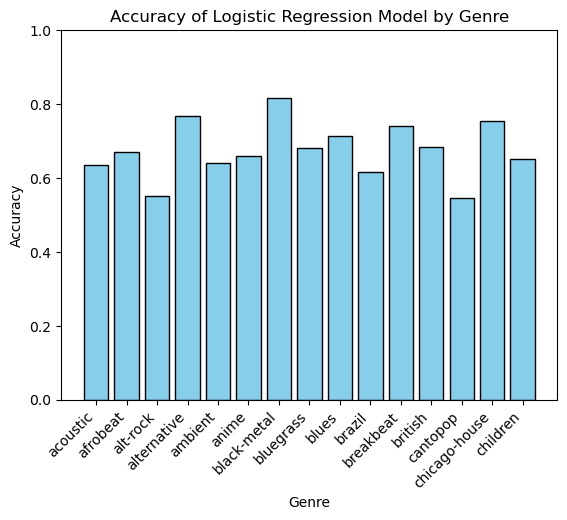

In [84]:
# Plotting the accuracies in a histogram

genres = list(genre_accuracies.keys())
accuracies = list(genre_accuracies.values())

plt.bar(genres, accuracies, color='skyblue', edgecolor='black')
plt.title('Accuracy of Logistic Regression Model by Genre')

plt.xlabel('Genre')
plt.ylabel('Accuracy')

plt.xticks(rotation=45, ha='right')
plt.ylim(0,1)

plt.savefig(FIG+'Logistic_Regression_Accuracy_by_Genre.pdf')

plt.show()